# Regression Machine Learning 
## House Price Prediction with MySQL

## Data Set Description
This is Boston House Price Dataset

Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information (in order):

1. CRIM-per capita crime rate by town
2.  ZN-proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS-proportion of non-retail business acres per town
4. CHAS-Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX-nitric oxides concentration (parts per 10 million)
6. RM-average number of rooms per dwelling
7. AGE-proportion of owner-occupied units built prior to 1940
8. DIS-weighted distances to five Boston employment centres
9. RAD-index of accessibility to radial highways
10. TAX-full-value property-tax rate per 10000 Dollars
11. PTRATIO-pupil-teacher ratio by town
12. B-1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT-% lower status of the population
14. MEDV-Median value of owner-occupied homes in $1000's


## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing & Loading the Dataset

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
325,0.19186,0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6
407,11.95110,0,18.1,0,0.659,5.608,100,1.2852,24,666,20.2,332.09,12.13,27.9
209,0.43571,0,10.59,1,0.489,5.344,100,3.875,4,277,18.6,396.9,23.09,20
471,4.03841,0,18.1,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6


### Data Preprocessing

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    object 
 2   INDUS    504 non-null    object 
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    object 
 5   RM       501 non-null    object 
 6   AGE      506 non-null    object 
 7   DIS      505 non-null    object 
 8   RAD      506 non-null    object 
 9   TAX      505 non-null    object 
 10  PTRATIO  505 non-null    object 
 11  B        505 non-null    object 
 12  LSTAT    505 non-null    object 
 13  MEDV     505 non-null    object 
dtypes: float64(1), object(13)
memory usage: 55.5+ KB


### Checking number of unique values for each feature

In [6]:
df[df.columns].nunique()

CRIM       504
ZN          27
INDUS       77
CHAS         3
NOX         82
RM         435
AGE        357
DIS        409
RAD         10
TAX         66
PTRATIO     47
B          354
LSTAT      452
MEDV       230
dtype: int64

### Changing Data Types

In [7]:
# List of columns to convert to float
columns_to_convert = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Convert empty strings to NaN and then convert the columns to float
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype(float)

# Check the data types after conversion
print(df.dtypes)



CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


### Handling Missing Values

In [8]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94,19.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,NaN,12.12,15.3


### Checking for Null Values

In [9]:
df.isnull().any() 

CRIM       False
ZN          True
INDUS       True
CHAS        True
NOX         True
RM          True
AGE         True
DIS         True
RAD         True
TAX         True
PTRATIO     True
B           True
LSTAT       True
MEDV        True
dtype: bool

In [10]:
df.isnull().sum()

CRIM        0
ZN          3
INDUS       7
CHAS        3
NOX         4
RM         13
AGE         2
DIS         8
RAD         8
TAX        12
PTRATIO     2
B           6
LSTAT       5
MEDV        5
dtype: int64

##### Observation:
We can clearly see there is some amount of null data present in our dataset.

In [11]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
376,15.28800,0.0,18.10,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24,13.9
60,0.14932,25.0,5.13,0.0,0.453,NaN,66.2,7.2254,8.0,NaN,19.7,395.11,13.15,18.7
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,31.6


In [12]:
df['CHAS'].value_counts()

0.0    469
1.0     34
Name: CHAS, dtype: int64

In [13]:
df['RAD'].value_counts()

24.0    132
5.0     113
4.0     108
3.0      38
6.0      26
2.0      24
8.0      24
1.0      19
7.0      14
Name: RAD, dtype: int64

In [14]:
#### Missing Values

mean_zn = df['ZN'].mean()
df['ZN'].fillna(mean_zn, inplace=True)

mean_indus = df['INDUS'].mean()
df['INDUS'].fillna(mean_indus, inplace=True)

mean_chas = df['CHAS'].mode()[0]
df['CHAS'].fillna(mean_chas, inplace=True)

mean_nox = df['NOX'].mean()
df['NOX'].fillna(mean_nox, inplace=True)

mean_rm = float(df['RM'].mean())
df['RM'].fillna(mean_rm, inplace=True)

mean_age = float(df['AGE'].mean())
df['AGE'].fillna(mean_age, inplace=True)

mean_dis = float(df['DIS'].mean())
df['DIS'].fillna(mean_dis, inplace=True)

mean_rad = float(df['RAD'].mode()[0])
df['RAD'].fillna(mean_rad, inplace=True)

mean_tax = float(df['TAX'].mean())
df['TAX'].fillna(mean_tax, inplace=True)

mean_pt = float(df['PTRATIO'].mean())
df['PTRATIO'].fillna(mean_pt, inplace=True)

mean_b = float(df['B'].mean())
df['B'].fillna(mean_b, inplace=True)

mean_ls = float(df['LSTAT'].mean())
df['LSTAT'].fillna(mean_ls, inplace=True)

mean_medv = float(df['MEDV'].mean())
df['MEDV'].fillna(mean_medv, inplace=True)

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##### Observation:
So finally we have handled all the null values.

In [16]:
df.duplicated().sum()

0

##### Observation:
There are no duplicates in the dataset.

# 1. Importing Data from MySQL Workbentch to Python

In [17]:
import mysql.connector as mysql

# Connect to the MySQL database
db = mysql.connect(
    host="localhost", 
    user="root", 
    password="12345", 
    database="house")

# Create a cursor
cursor = db.cursor()

# Replace 'your_table_name' with your actual table name
table_name = 'boston_data'

# Execute a SELECT query to retrieve data from the table
query = f"SELECT * FROM `{table_name}`"
cursor.execute(query)

# Fetch all the rows from the last executed statement
table_data = cursor.fetchall()

# Get column names from the cursor description
columns = [i[0] for i in cursor.description]

# Create a Pandas DataFrame
df = pd.DataFrame(table_data, columns=columns)


In [18]:
import pandas as pd
import mysql.connector as mysql

# Connect to the MySQL database
db = mysql.connect(
    host="localhost",
    user="root",
    password="12345",
    database="house"
)

# Create a cursor
cursor = db.cursor()

# Replace 'your_table_name' with your actual table name
table_name = 'boston_data'

# Execute a SELECT query to retrieve the entire data from the table
query = f"SELECT * FROM `{table_name}`"
cursor.execute(query)

# Fetch all the rows from the last executed statement
table_data = cursor.fetchall()

# Get column names from the cursor description
columns = [i[0] for i in cursor.description]

# Create a Pandas DataFrame
df = pd.DataFrame(table_data, columns=columns)


In [19]:
# Display the DataFrame
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
367,88.97620,0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
61,0.09164,0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
312,0.19186,0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6
246,0.65665,20,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90,30.1
27,1.38799,0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71,13.2


In [20]:
#reading first 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
#reading last 5 rows
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
488,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
489,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
490,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
491,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
492,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


## General Information

In [22]:
#shape of dataset
df.shape

(493, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     493 non-null    float64
 1   ZN       493 non-null    int64  
 2   INDUS    493 non-null    float64
 3   CHAS     493 non-null    int64  
 4   NOX      493 non-null    float64
 5   RM       493 non-null    float64
 6   AGE      493 non-null    float64
 7   DIS      493 non-null    float64
 8   RAD      493 non-null    int64  
 9   TAX      493 non-null    int64  
 10  PTRATIO  493 non-null    float64
 11  B        493 non-null    float64
 12  LSTAT    493 non-null    float64
 13  MEDV     493 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 54.0 KB


In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
df.dtypes

CRIM       float64
ZN           int64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### Checking Null Values

In [26]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### One thing to be noted here is, when we have imported data from csv file there were some null values, while when we imported from MySQL workbentch there are no null values. It means that, SQL by-default filters out the null values.

### Checking Duplicated Data

In [27]:
df.duplicated().sum()

0

#### There are no duplicates in the dataset

### Statistical Description of Data

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,493.0,3.700425,8.697403,0.00632,0.08187,0.26363,3.77498,88.9762
ZN,493.0,11.381339,23.409066,0.00000,0.00000,0.00000,13.00000,100.0000
INDUS,493.0,11.230771,6.886922,0.46000,5.19000,9.90000,18.10000,27.7400
CHAS,493.0,0.070994,0.257076,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,493.0,0.556247,0.116648,0.38500,0.44900,0.53800,0.63100,0.8710
RM,493.0,6.289057,0.707924,3.56100,5.88700,6.20900,6.62900,8.7800
AGE,493.0,68.533671,28.060226,2.90000,45.00000,77.30000,93.90000,100.0000
DIS,493.0,3.760385,2.107465,1.12960,2.07880,3.10250,5.11670,12.1265
RAD,493.0,9.691684,8.773706,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,493.0,411.334686,169.446947,187.00000,281.00000,335.00000,666.00000,711.0000


In [29]:
df['Price'] = df['MEDV']
df.drop('MEDV', axis=1, inplace=True)

In [30]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
401,45.74610,0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
371,20.08490,0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
230,0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7


## Exploratory Data Analysis (EDA)

### Univariate Analysis

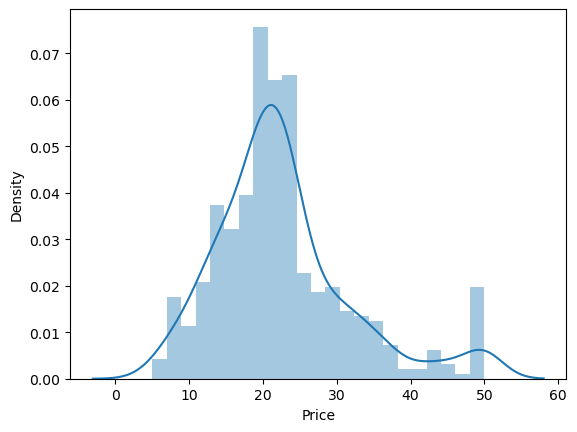

In [31]:
sns.distplot(df['Price'])
plt.show()

##### Box Plots

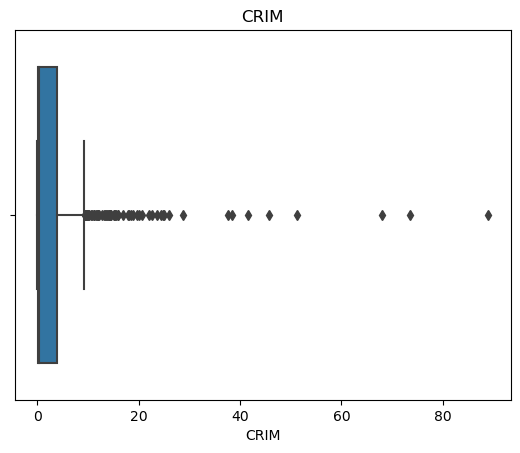

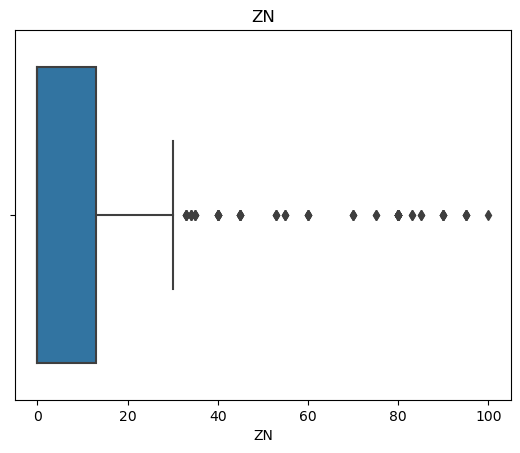

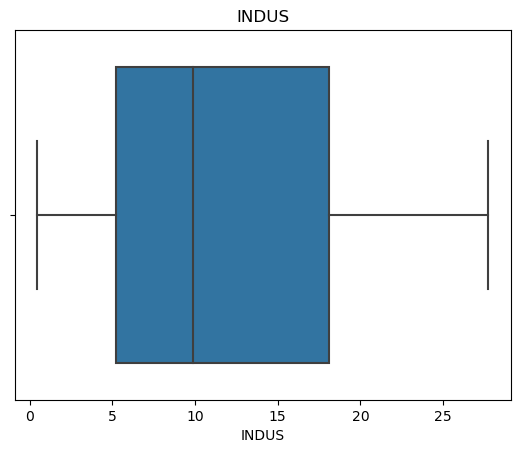

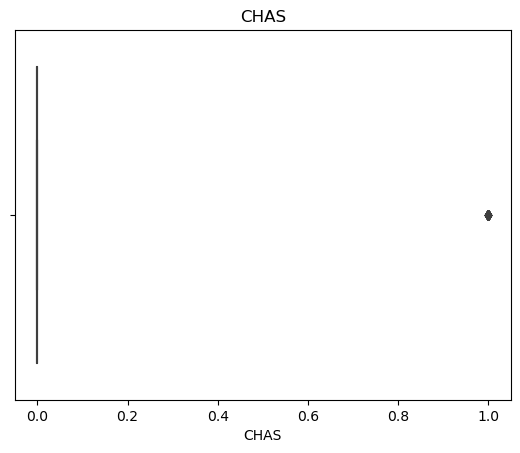

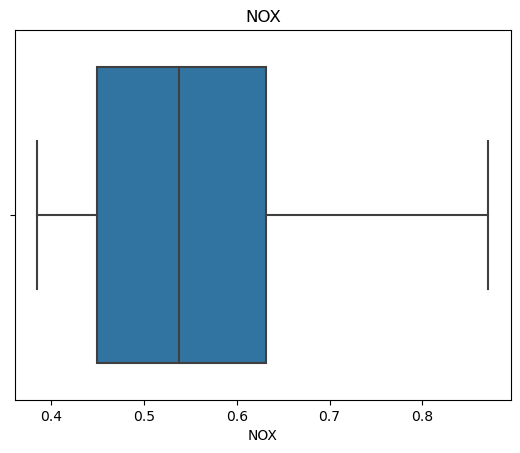

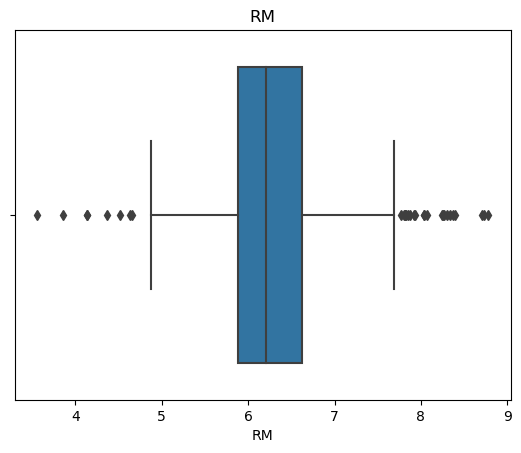

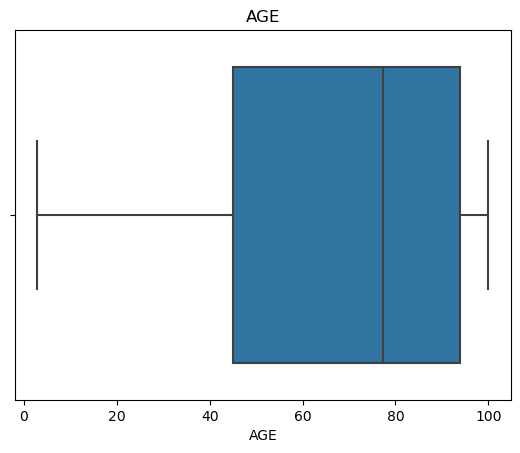

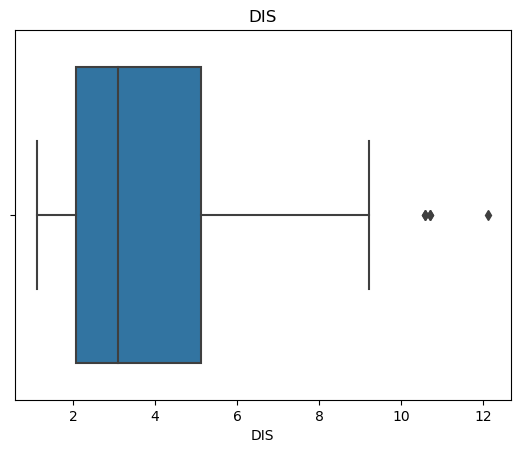

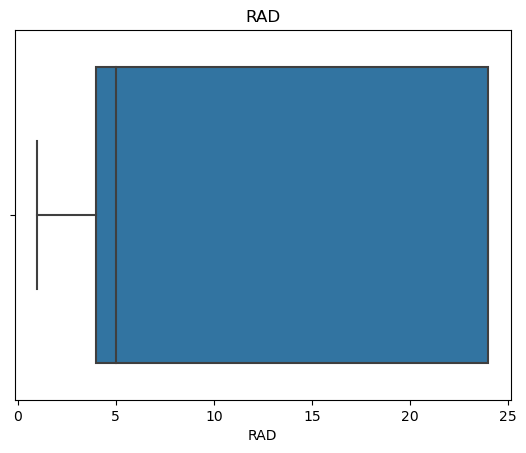

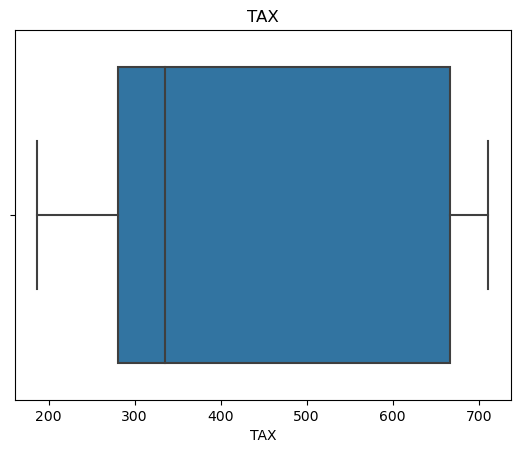

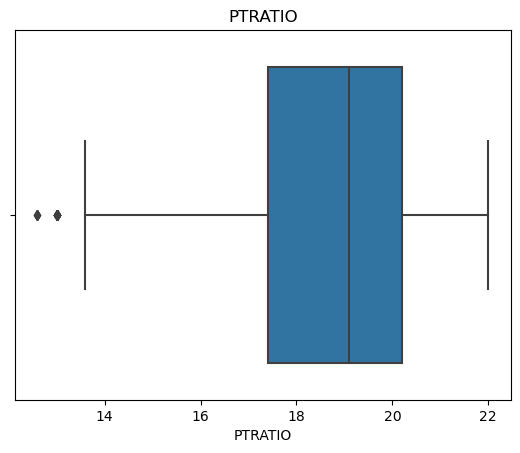

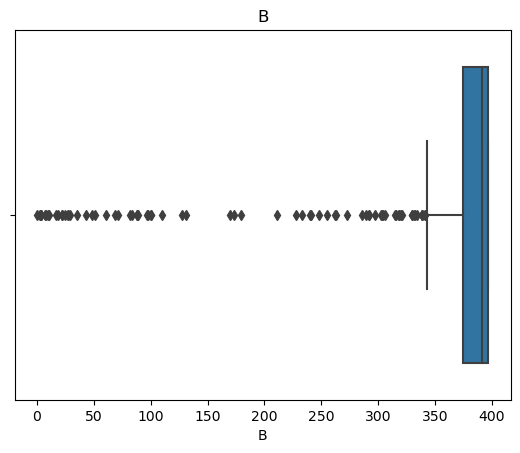

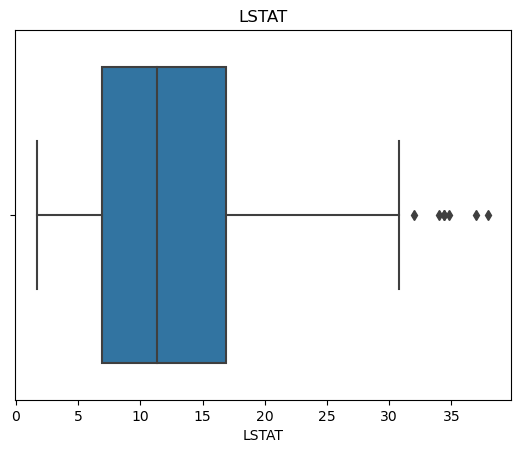

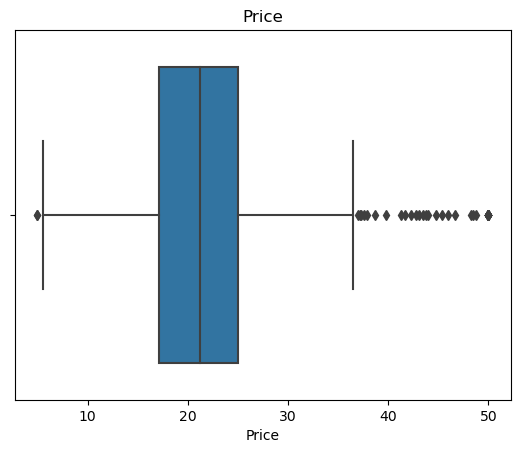

In [32]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

##### Histograms

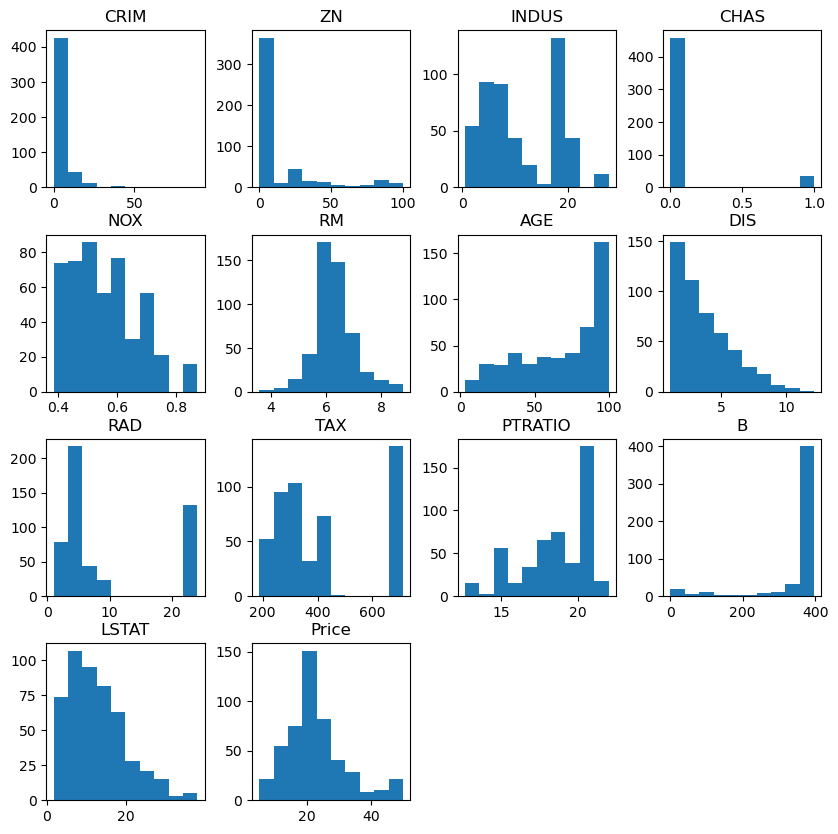

In [33]:
df.hist(bins=10,figsize=(10,10),grid=False);

##### Observation:
We can see that some variables have an exponential distribution, such as CRIM, ZN, AGE and B. We can see that others have a bimodal distribution such as RAD and TAX.

### Multivariate Analysis : 

### Pairplot

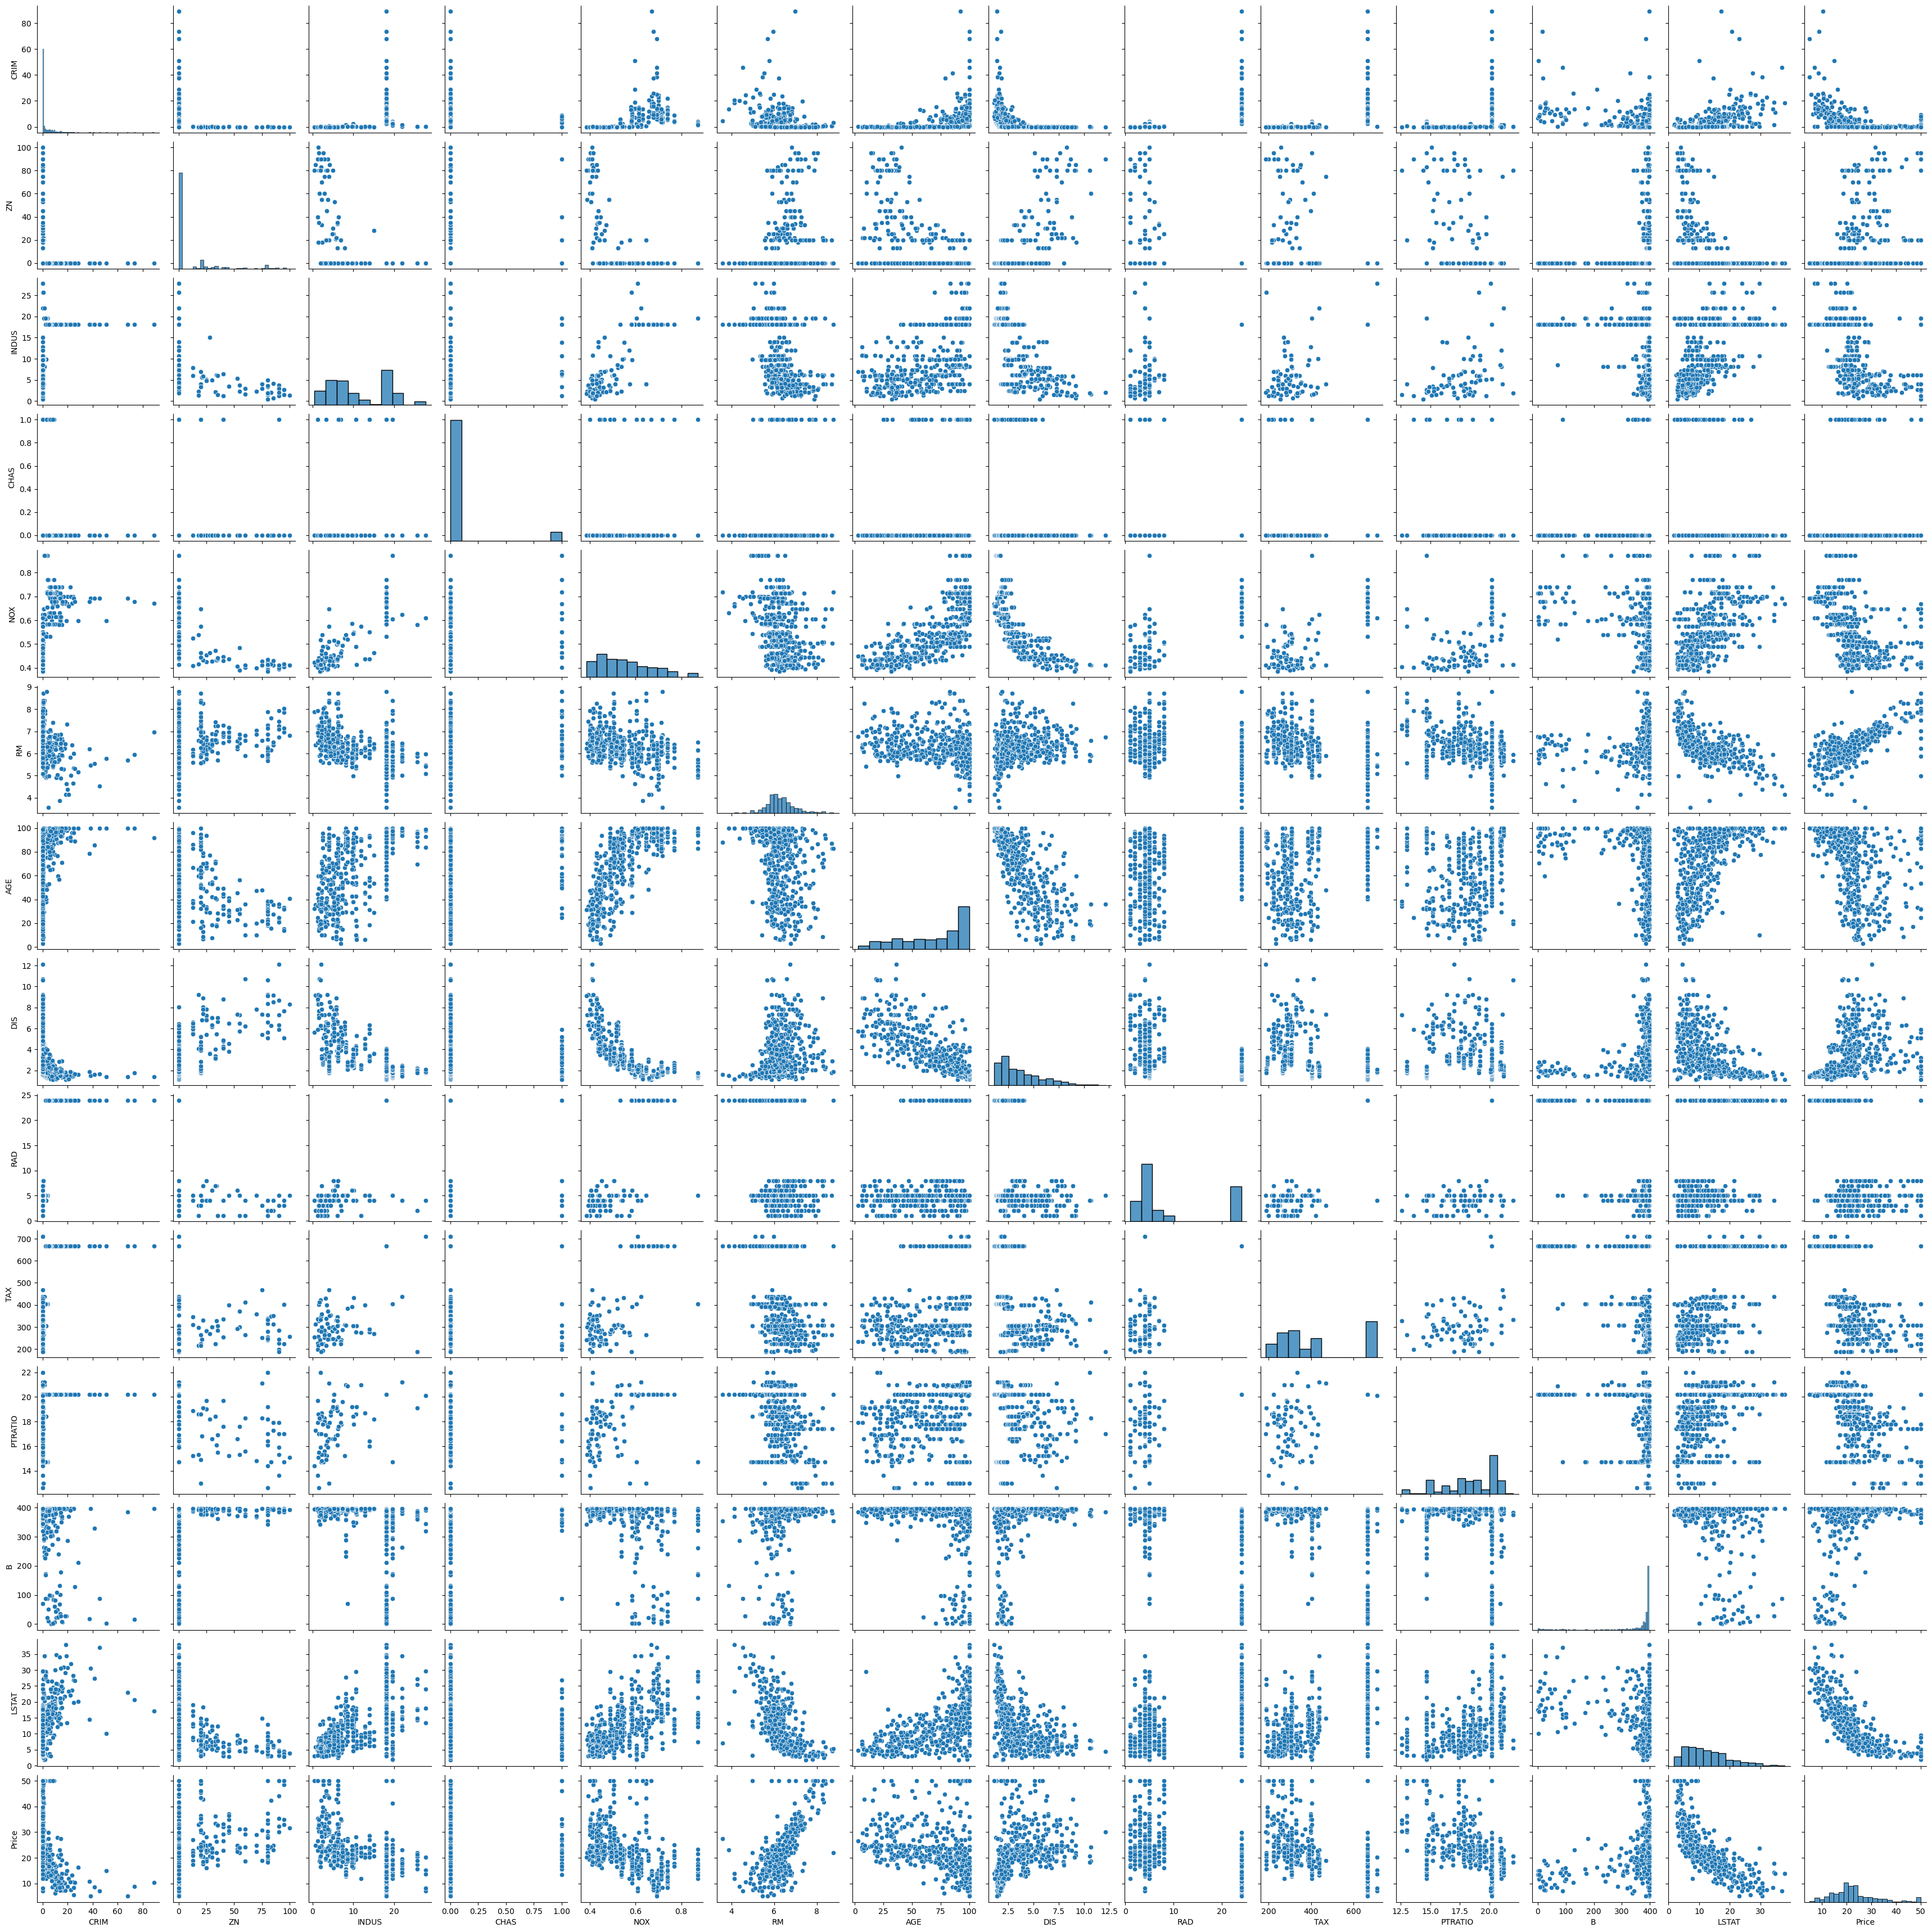

In [34]:
sns.pairplot(df)

#### Correlation Between Features

In [35]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.202723,0.405549,-0.058821,0.419040,-0.223155,0.359199,-0.378414,0.623837,0.581139,0.294247,-0.382668,0.468345,-0.394019
ZN,-0.202723,1.000000,-0.538815,-0.043349,-0.520480,0.307003,-0.570517,0.673329,-0.317321,-0.318581,-0.395484,0.177433,-0.413640,0.355166
INDUS,0.405549,-0.538815,1.000000,0.059804,0.761613,-0.399847,0.653195,-0.708182,0.595105,0.718759,0.386470,-0.355596,0.620153,-0.491229
CHAS,-0.058821,-0.043349,0.059804,1.000000,0.088198,0.090117,0.088423,-0.095942,-0.011903,-0.040954,-0.122401,0.051703,-0.052460,0.174317
NOX,0.419040,-0.520480,0.761613,0.088198,1.000000,-0.307617,0.739073,-0.769870,0.610010,0.664525,0.188568,-0.377740,0.606086,-0.432429
RM,-0.223155,0.307003,-0.399847,0.090117,-0.307617,1.000000,-0.234528,0.211206,-0.216696,-0.300754,-0.362151,0.131217,-0.613104,0.693836
AGE,0.359199,-0.570517,0.653195,0.088423,0.739073,-0.234528,1.000000,-0.762695,0.466601,0.514619,0.265361,-0.278429,0.597672,-0.369920
DIS,-0.378414,0.673329,-0.708182,-0.095942,-0.769870,0.211206,-0.762695,1.000000,-0.494476,-0.530157,-0.230034,0.289128,-0.520242,0.257206
RAD,0.623837,-0.317321,0.595105,-0.011903,0.610010,-0.216696,0.466601,-0.494476,1.000000,0.910410,0.474042,-0.441417,0.506125,-0.390608
TAX,0.581139,-0.318581,0.718759,-0.040954,0.664525,-0.300754,0.514619,-0.530157,0.910410,1.000000,0.468478,-0.438845,0.563303,-0.478791


### Heatmap to visualize the correlation between features

<AxesSubplot:>

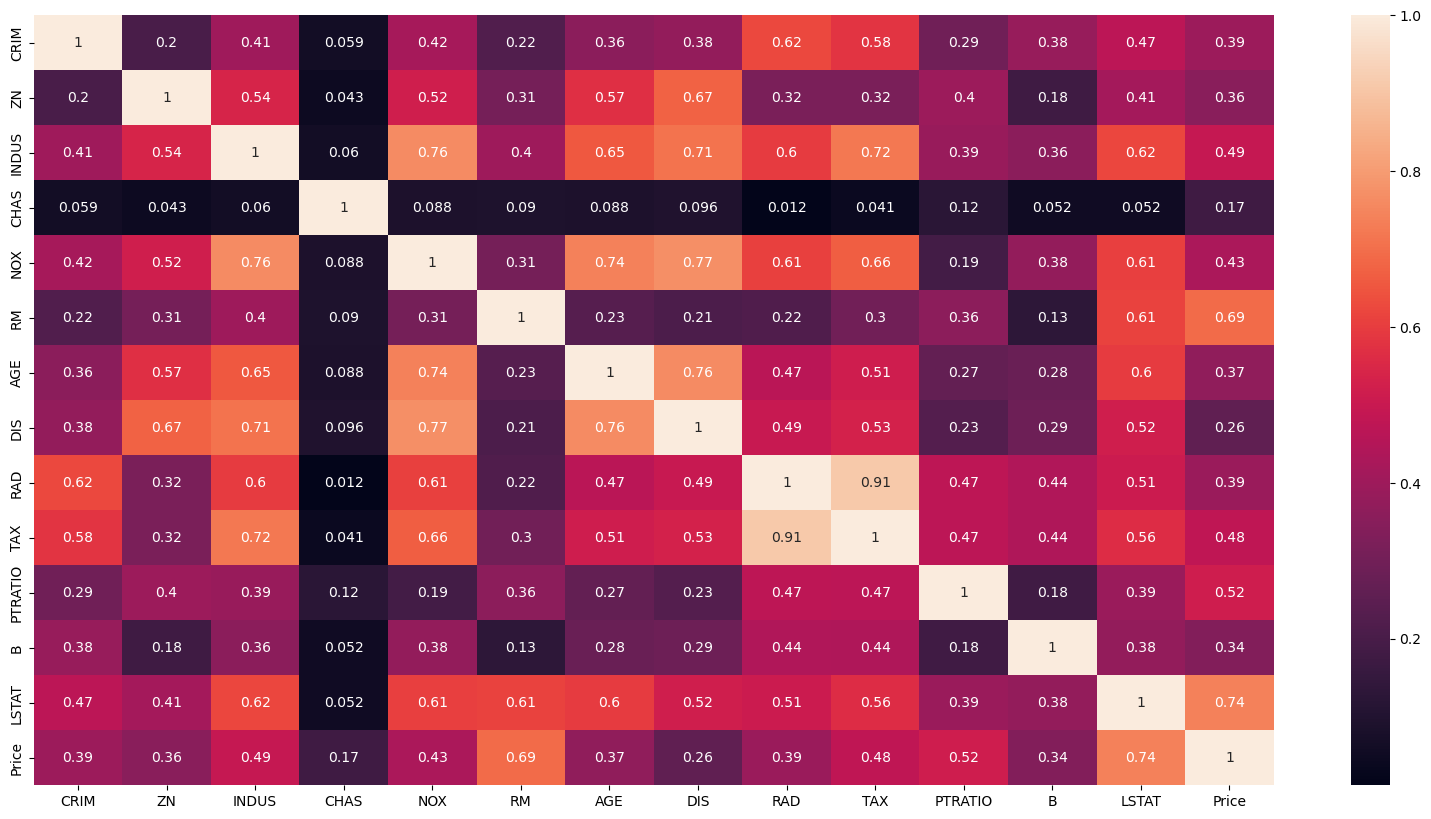

In [36]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

##### Observation:
From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, RM, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. These variables we need to consider when we optimze our predictive value.

### Analyze Correlated Features

Text(0, 0.5, 'Price')

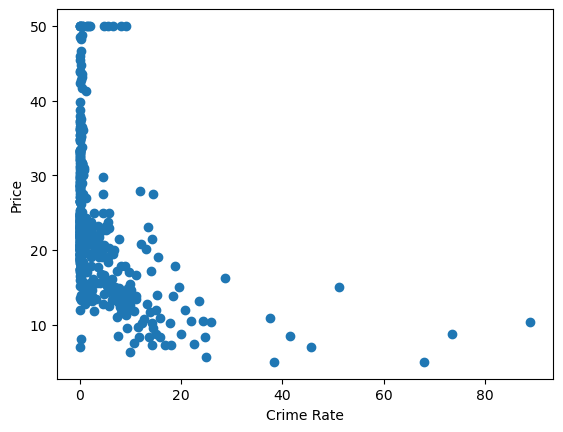

In [37]:
plt.scatter(df['CRIM'],df['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

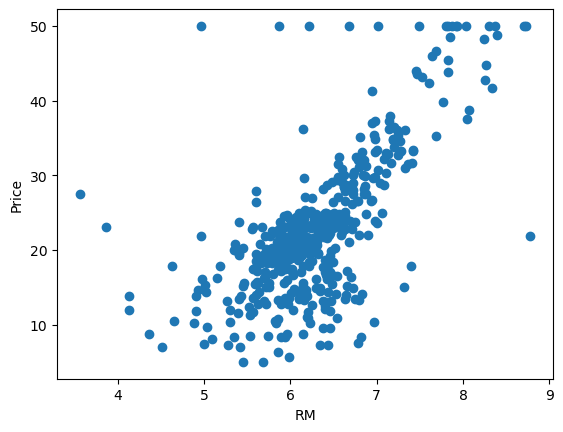

In [38]:
plt.scatter(df['RM'],df['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<AxesSubplot:xlabel='RM', ylabel='Price'>

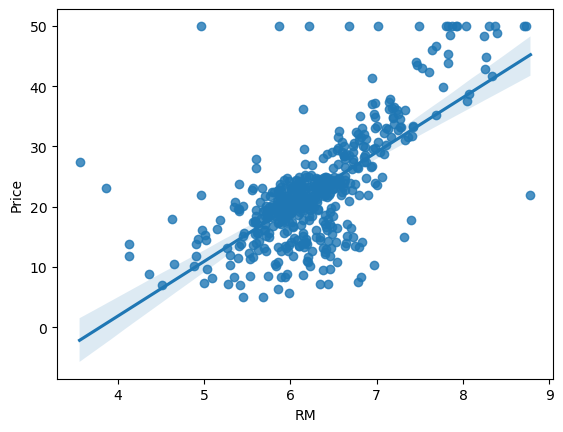

In [39]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=df)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

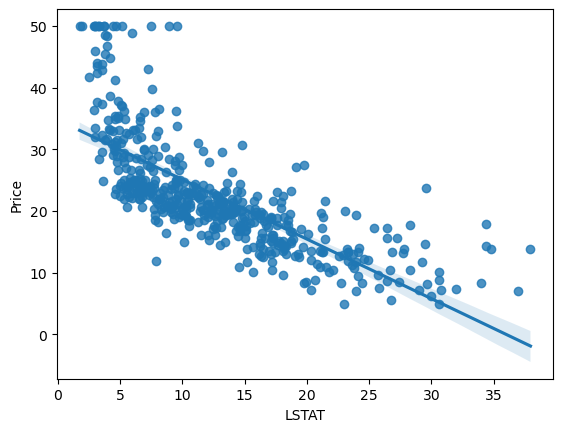

In [40]:
sns.regplot(x="LSTAT",y="Price",data=df)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

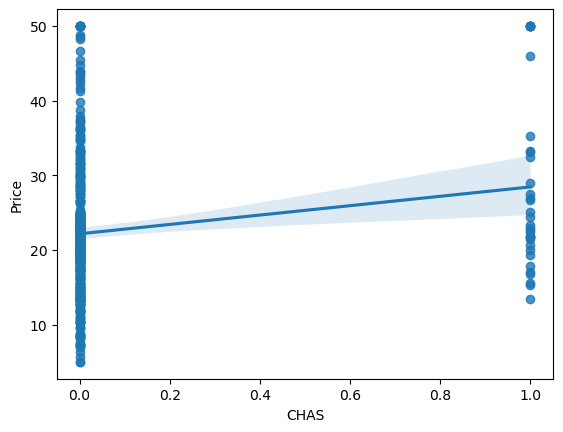

In [41]:
sns.regplot(x="CHAS",y="Price",data=df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

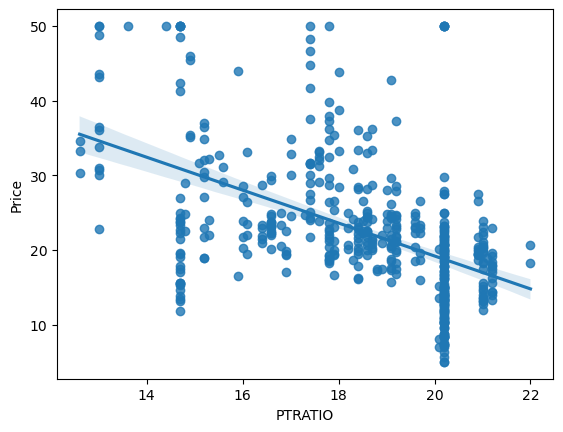

In [42]:
sns.regplot(x="PTRATIO",y="Price",data=df)

## Feature Engineering

### Independent & Dependent Features

In [43]:
## Independent and Dependent features

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [44]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [45]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
488    22.4
489    20.6
490    23.9
491    22.0
492    11.9
Name: Price, Length: 493, dtype: float64

### Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(345, 13) (345,) (148, 13) (148,)


In [48]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
45,0.01311,90,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
16,0.72580,0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
455,15.57570,0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
352,4.55587,0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.13058,0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37
270,0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16
348,3.83684,0,18.10,0,0.770,6.251,91.1,2.2955,24,666,20.2,350.65,14.19
435,9.32909,0,18.10,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [49]:
y_train

45     35.4
16     18.2
455    19.1
352    27.5
3      33.4
       ... 
106    20.4
270    50.0
348    19.9
435    14.1
102    18.5
Name: Price, Length: 345, dtype: float64

In [50]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
454,4.42228,0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32
73,0.05059,0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
310,0.28392,0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
175,0.12579,45,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2,382.84,4.56
332,0.03113,0,4.39,0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,6.53876,0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96
408,7.02259,0,18.10,0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
193,0.22969,0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97
5,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [51]:
y_test

454    19.1
73     23.9
310    18.5
175    29.8
332    17.5
       ... 
357    50.0
408    14.2
193    24.4
5      28.7
116    18.0
Name: Price, Length: 148, dtype: float64

### Standardize the Data

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_train=scaler.fit_transform(X_train)

In [54]:
X_test=scaler.transform(X_test)

In [55]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [56]:
print(X_train.shape)
X_train

(345, 13)


array([[-0.44750699,  3.16666862, -1.46349199, ..., -0.21579214,
         0.4204535 , -1.06992174],
       [-0.36123415, -0.49889433, -0.45826415, ...,  1.20532666,
         0.36250869, -0.16528047],
       [ 1.43638212, -0.49889433,  0.98856668, ...,  0.83858632,
         0.10408414,  0.79249274],
       ...,
       [ 0.01536476, -0.49889433,  0.98856668, ...,  0.83858632,
        -0.10640213,  0.24159837],
       [ 0.68021489, -0.49889433,  0.98856668, ...,  0.83858632,
         0.43173994,  0.79249274],
       [-0.43186702, -0.49889433, -0.18662021, ..., -0.26163468,
         0.33679422, -0.28133182]])

In [57]:
y_train

45     35.4
16     18.2
455    19.1
352    27.5
3      33.4
       ... 
106    20.4
270    50.0
348    19.9
435    14.1
102    18.5
Name: Price, Length: 345, dtype: float64

In [58]:
print(X_test.shape)
X_test

(148, 13)


array([[ 0.08623369, -0.49889433,  0.98856668, ...,  0.83858632,
        -0.3316655 ,  1.23852144],
       [-0.44296995, -0.49889433, -0.98847826, ...,  0.05926311,
         0.43173994, -0.39738318],
       [-0.41472479, -0.49889433, -0.56866489, ...,  0.56353107,
         0.36460308, -0.10096285],
       ...,
       [-0.42128946, -0.49889433, -0.10236701, ...,  0.10510565,
         0.40811986, -0.20862495],
       [-0.44548057, -0.49889433, -1.32403842, ...,  0.1509482 ,
         0.39939324, -1.01399338],
       [-0.4096999 , -0.49889433,  1.53911777, ...,  1.29701174,
         0.43173994,  0.40938346]])

In [59]:
y_test

454    19.1
73     23.9
310    18.5
175    29.8
332    17.5
       ... 
357    50.0
408    14.2
193    24.4
5      28.7
116    18.0
Name: Price, Length: 148, dtype: float64

## Model Training

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regression=LinearRegression()

In [62]:
regression.fit(X_train,y_train)

LinearRegression()

In [63]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.02572979  1.2895748  -0.04986306  0.76815206 -2.00084176  2.73487071
 -0.07790913 -3.22540823  2.83613121 -1.80661705 -1.94810593  1.0143469
 -3.81669939]


In [64]:
print(regression.intercept_)

23.024637681159422


In [65]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [66]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [67]:
reg_pred

array([17.41041897, 24.8209643 , 19.52575419, 32.89659869, 16.74141429,
       28.01993747, 25.7679341 , 26.15174971, 22.35237375, 21.49849127,
       23.56608908, 22.69926717, 34.26884241, 22.77395601, 20.79505304,
       29.19543098, 20.95381453, 22.43851215, 20.59676539, 14.23009628,
       19.47855387, 31.22875694, 20.68452046, 25.34175606, 25.77296392,
       18.73966096,  7.33545948,  8.27715514, 30.62578003, 22.59801143,
       17.65416444, 25.92793889, 16.76765121, 30.42373055, 22.2488487 ,
       27.13813917, 23.72861258, 41.25343345, 26.28380567, 24.96266945,
       23.40617852, 18.21136825, 31.99156684, 19.49766082, 30.11332185,
       19.80898883, 20.97307802, 35.8079271 , 28.59105805, 28.71586693,
       13.23065716, 19.42467797, 11.362667  , 14.05646088, 17.77226283,
        1.16489438, 14.35182341, 23.53432741, 43.11221503, 27.65229844,
       19.97511445, 17.74056469, 12.6535578 , 34.31416863, 21.1723351 ,
       36.71502797, 23.49827004, 27.18252466, 27.45847219, 34.70

## Assumptions

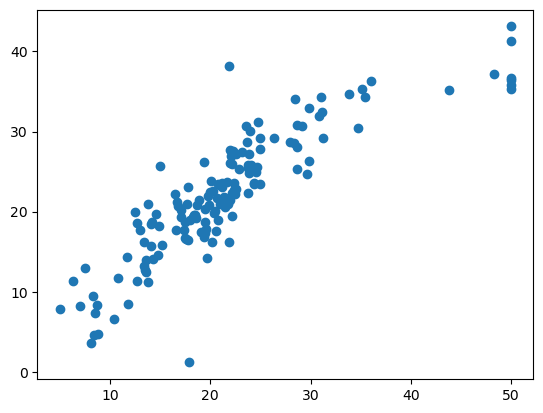

In [68]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [69]:
## Residuals
residuals=y_test-reg_pred

In [70]:
residuals

454     1.689581
73     -0.920964
310    -1.025754
175    -3.096599
332     0.758586
         ...    
357    14.641832
408    -4.473008
193     0.774625
5       3.379766
116    -0.910275
Name: Price, Length: 148, dtype: float64

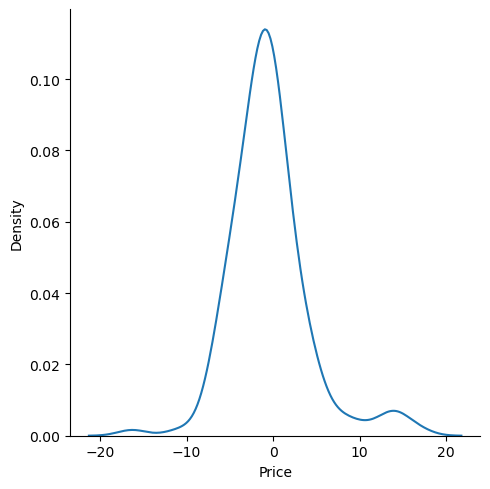

In [71]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

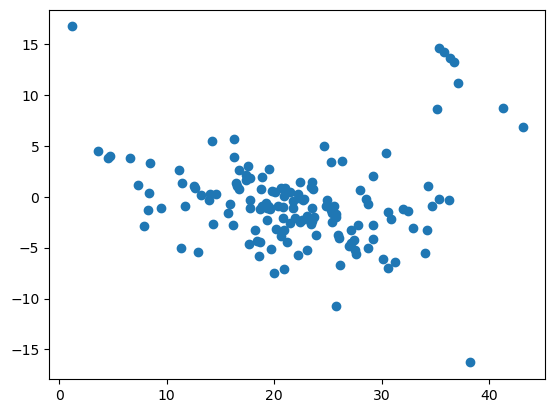

In [72]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.177132541440079
20.623954651189145
4.541360440571651


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [74]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7460459521766372


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [75]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7214086191788482

### More Regression Supervised Machine Learning Algorithms

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
import numpy as np

# Assuming you have your dataset loaded and split into X_train, X_test, y_train, y_test
# If not, you can use train_test_split to split your dataset into training and testing sets.

# Example data loading
# X, y = load_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Iterate through the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    explained_var = explained_variance_score(y_test, predictions)
    max_err = max_error(y_test, predictions)

    # Print the results
    print(f"\n{model.__class__.__name__} MSE: {mse}")
    print(f"{model.__class__.__name__} RMSE: {rmse}")
    print(f"{model.__class__.__name__} MAE: {mae}")
    print(f"{model.__class__.__name__} R-squared: {r2}")
    print(f"{model.__class__.__name__} Explained Variance: {explained_var}")
    print(f"{model.__class__.__name__} Max Error: {max_err}")



LinearRegression MSE: 20.623954651189145
LinearRegression RMSE: 4.541360440571651
LinearRegression MAE: 3.177132541440079
LinearRegression R-squared: 0.7460459521766372
LinearRegression Explained Variance: 0.7490539565655175
LinearRegression Max Error: 16.735105619204695

Ridge MSE: 20.626491177519544
Ridge RMSE: 4.541639701420572
Ridge MAE: 3.1717440156647383
Ridge R-squared: 0.7460147185388644
Ridge Explained Variance: 0.7491656612701338
Ridge Max Error: 16.74011379059228

Lasso MSE: 27.19511560517354
Lasso RMSE: 5.21489363316008
Lasso MAE: 3.8411971328355827
Lasso R-squared: 0.6651316488149901
Lasso Explained Variance: 0.6791315706653276
Lasso Max Error: 20.243784013768547

DecisionTreeRegressor MSE: 19.22675675675676
DecisionTreeRegressor RMSE: 4.384832580242575
DecisionTreeRegressor MAE: 2.8216216216216217
DecisionTreeRegressor R-squared: 0.7632504149919646
DecisionTreeRegressor Explained Variance: 0.7644503112937246
DecisionTreeRegressor Max Error: 21.5

RandomForestRegressor MS

### Hyper-parameter Tunning the Models

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
import numpy as np

# Assuming you have your dataset loaded and split into X_train, X_test, y_train, y_test
# If not, you can use train_test_split to split your dataset into training and testing sets.

# Example data loading
# X, y = load_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameter grids
models = [
    {
        'name': 'Linear Regression',
        'model': LinearRegression(),
        'param_grid': {}
    },
    {
        'name': 'Ridge Regression',
        'model': Ridge(),
        'param_grid': {'alpha': [0.1, 1, 10]}
    },
    {
        'name': 'Lasso Regression',
        'model': Lasso(),
        'param_grid': {'alpha': [0.1, 1, 10]}
    },
    {
        'name': 'Decision Tree Regression',
        'model': DecisionTreeRegressor(),
        'param_grid': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    },
    {
        'name': 'Random Forest Regression',
        'model': RandomForestRegressor(),
        'param_grid': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    }
]

best_model = None
best_metrics = None
best_model_name = None

# Iterate through the models
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Create the GridSearchCV object with reduced verbosity
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, verbose=1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Use the best model for predictions
    best_model_instance = grid_search.best_estimator_
    best_predictions = best_model_instance.predict(X_test)

    # Evaluate the best model
    mse = mean_squared_error(y_test, best_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, best_predictions)
    r2 = r2_score(y_test, best_predictions)
    explained_var = explained_variance_score(y_test, best_predictions)
    max_err = max_error(y_test, best_predictions)

    # Print the results for the best model
    print(f"\nBest {model_name} Hyperparameters: {best_params}")
    print(f"Best {model_name} MSE: {mse}")
    print(f"Best {model_name} RMSE: {rmse}")
    print(f"Best {model_name} MAE: {mae}")
    print(f"Best {model_name} R-squared: {r2}")
    print(f"Best {model_name} Explained Variance: {explained_var}")
    print(f"Best {model_name} Max Error: {max_err}")

    # Check if this model is the best so far
    if best_model is None or mse < best_metrics['mse']:
        best_model = best_model_instance
        best_metrics = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'explained_var': explained_var, 'max_err': max_err}
        best_model_name = model_name

# Print the results for the overall best model
print("\nBest Model Overall:", best_model_name)
print(f"Best Model Overall Hyperparameters: {best_model.get_params()}")
print(f"Best Model Overall MSE: {best_metrics['mse']}")
print(f"Best Model Overall RMSE: {best_metrics['rmse']}")
print(f"Best Model Overall MAE: {best_metrics['mae']}")
print(f"Best Model Overall R-squared: {best_metrics['r2']}")
print(f"Best Model Overall Explained Variance: {best_metrics['explained_var']}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Linear Regression Hyperparameters: {}
Best Linear Regression MSE: 20.623954651189145
Best Linear Regression RMSE: 4.541360440571651
Best Linear Regression MAE: 3.177132541440079
Best Linear Regression R-squared: 0.7460459521766372
Best Linear Regression Explained Variance: 0.7490539565655175
Best Linear Regression Max Error: 16.735105619204695
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Ridge Regression Hyperparameters: {'alpha': 10}
Best Ridge Regression MSE: 20.774689994442944
Best Ridge Regression RMSE: 4.55792606285391
Best Ridge Regression MAE: 3.157812351785418
Best Ridge Regression R-squared: 0.7441898653486367
Best Ridge Regression Explained Variance: 0.7483651751496274
Best Ridge Regression Max Error: 16.719460744094246
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Lasso Regression Hyperparameters: {'alpha': 0.1}
Best Lasso Regression MSE: 20.9502885100816
Best Lasso Regr

## Pickling The Model file For Deployment

In [78]:
import pickle

In [79]:
# Assuming best_model is your trained Random Forest model
# You can replace "best_model" with the variable name you used to store your trained Random Forest model

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved to random_forest_model.pkl")


Model saved to random_forest_model.pkl


**END OF DOCUMENT**